# Data Source & Extraction

In [15]:
import subprocess

print(
    subprocess.run(
        args = ["python", "web_scraper.py"], 
        check = True, 
        capture_output = True, 
        text = True
    ).stdout
)

Loading chunk 0 of 200000 rows
Loading chunk 1 of 200000 rows
Loading chunk 2 of 200000 rows
Loading chunk 3 of 200000 rows
Loading chunk 4 of 200000 rows
Loading chunk 5 of 200000 rows
Loading chunk 6 of 200000 rows
Loading chunk 7 of 200000 rows
Loading chunk 8 of 200000 rows
Loading chunk 9 of 200000 rows
Loading chunk 10 of 200000 rows
Loading chunk 11 of 200000 rows
Loading chunk 12 of 200000 rows
Loading chunk 13 of 200000 rows
Loading chunk 14 of 200000 rows
Loading chunk 15 of 200000 rows
Loading chunk 16 of 200000 rows
Loading chunk 17 of 200000 rows
Loading chunk 18 of 200000 rows
Loading chunk 19 of 200000 rows
Loading chunk 20 of 200000 rows
Loading chunk 21 of 200000 rows
Loading chunk 22 of 200000 rows
Loading chunk 23 of 24615 rows



# Data Exploration & Transformation

In [2]:
import os
import pandas as pd

ROOT = "data/"
df = pd.concat(
    objs = [
        pd.read_feather(ROOT + file)
        for file 
        in os.listdir(ROOT)
    ]
)
df["sentiment"] = df["rating"].apply(
    lambda rating: 1 if rating > 3 else 0 if rating < 3 else -1
)
df = df.query("sentiment != -1").reset_index(drop = True)

In [3]:
df["sentiment"].value_counts()

sentiment
1    3445132
0     839397
Name: count, dtype: int64

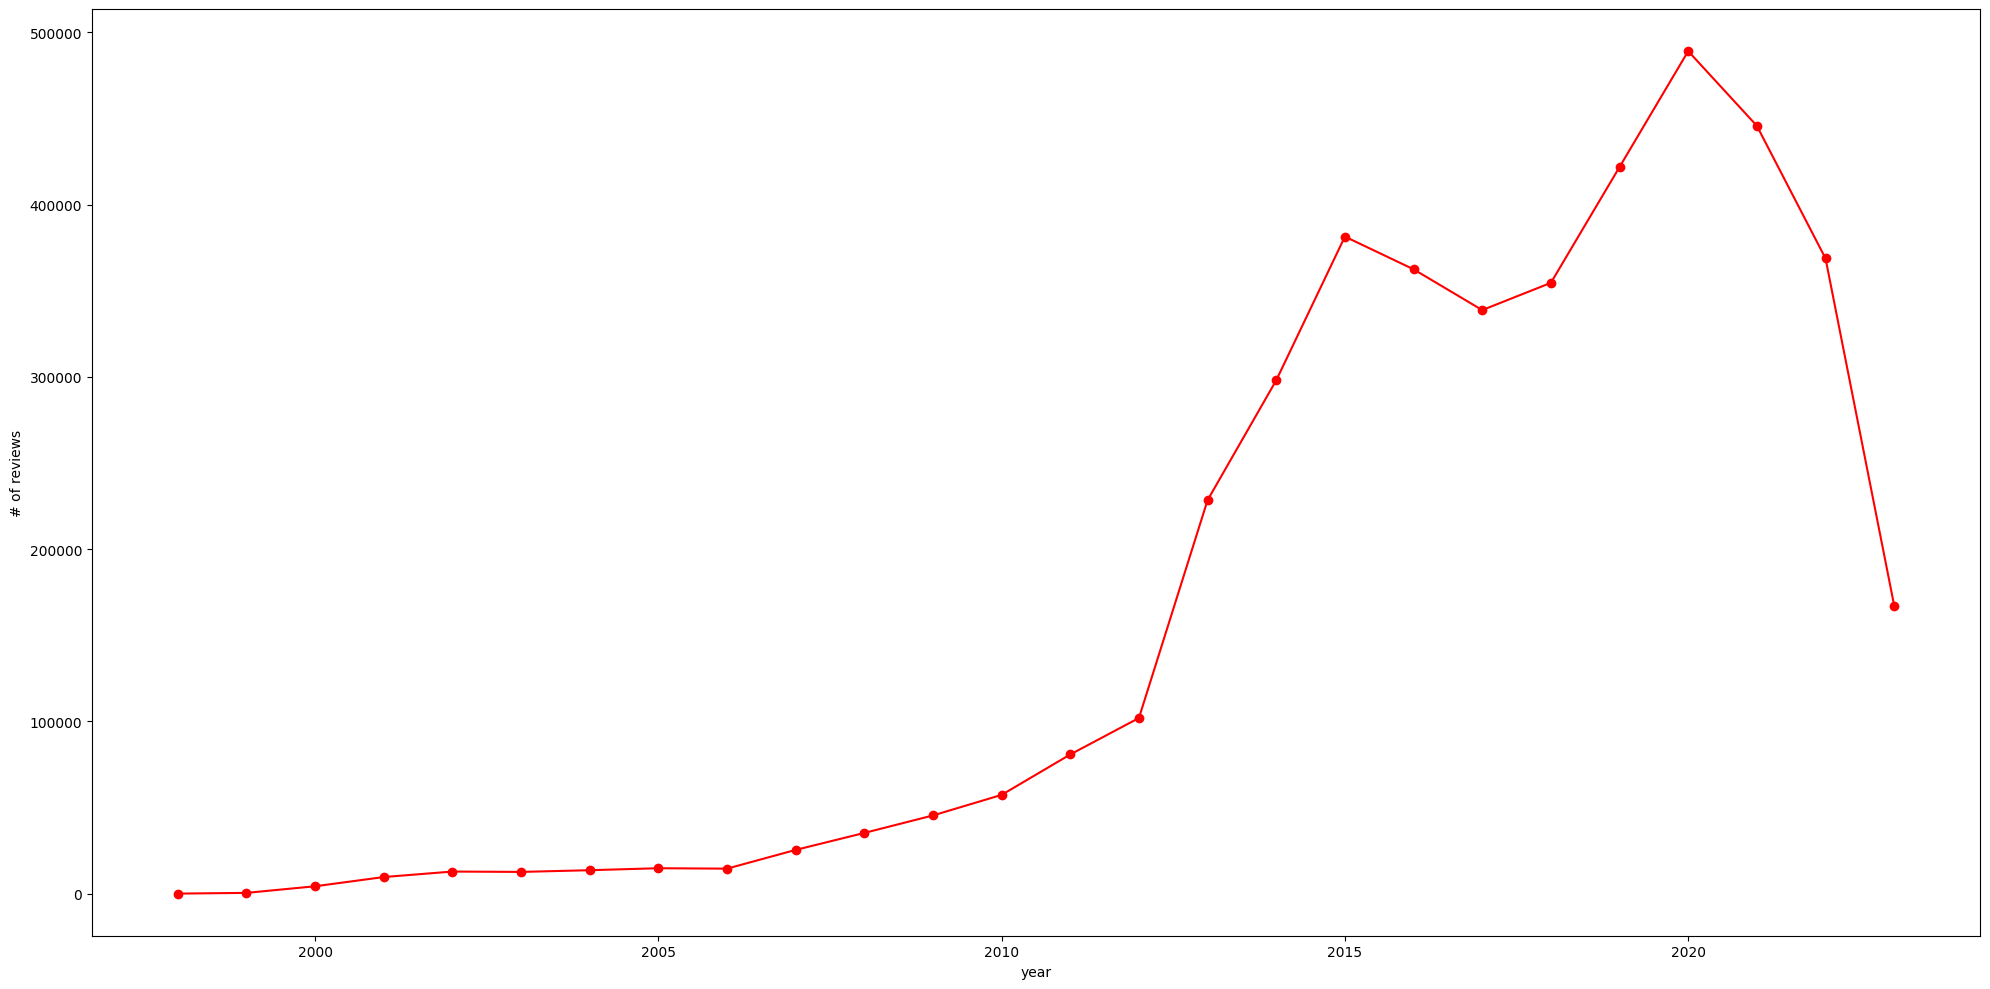

In [4]:
import matplotlib.pyplot as plt



visual_data = df["timestamp"].dt.year.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.plot(
    visual_data.index, 
    visual_data.values, 
    marker = "o",
    color = "red"
)
plt.xlabel("year")
plt.ylabel("# of reviews")
plt.tight_layout()
plt.show()


# Preprocessing and Splitting Data

In [5]:
len(df.query("`timestamp`.dt.year <= 2019"))/len(df)

0.6567342641396522

In [6]:
len(df.query("`timestamp`.dt.year > 2019"))/len(df)

0.34326573586034775

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords_list
import string


train = df.query("`timestamp`.dt.year <= 2019")
test = df.query("`timestamp`.dt.year > 2019")
exclude_lists = list(stopwords_list) + list(string.punctuation)
count_vect = CountVectorizer(
    stop_words = exclude_lists,
    ngram_range=(2, 2),
)
X_train, X_test, y_train, y_test = (
    count_vect.fit_transform(train["text"].values),
    count_vect.transform(test["text"].values), 
    train["sentiment"].values, 
    test["sentiment"].values
)

c:\Users\luket\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


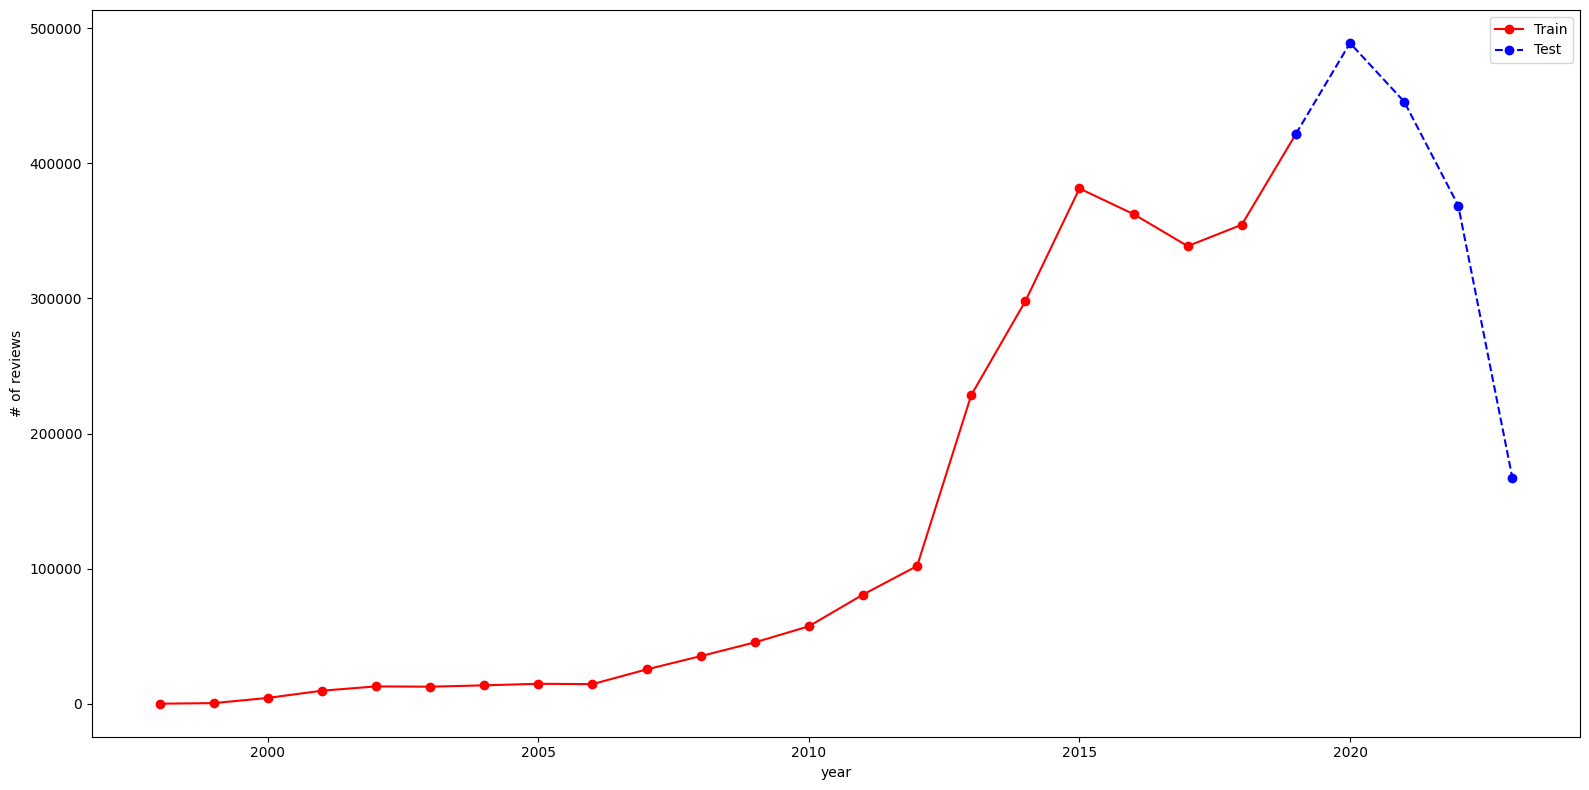

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

visual_data = train["timestamp"].dt.year.value_counts().sort_index()
plt.plot(
    visual_data.index, 
    visual_data.values, 
    marker = "o",
    color = "red",
    label = "Train"
)

visual_data = df.query("`timestamp`.dt.year >= 2019")["timestamp"].dt.year.value_counts().sort_index()
plt.plot(
    visual_data.index, 
    visual_data.values, 
    marker = "o",
    linestyle = "--",
    color = "blue",
    label = "Test"
)

plt.legend()
plt.xlabel("year")
plt.ylabel("# of reviews")
plt.tight_layout()
plt.show()


In [9]:
pd.DataFrame(
    X_test[:50].toarray(),
    columns=count_vect.get_feature_names_out()
).iloc[:20,-15:]

,𝐆𝐑𝐎𝐒𝐒𝐋𝐘 𝐎𝐕𝐄𝐑𝐏𝐑𝐈𝐂𝐄𝐃,𝐌𝐚𝐭𝐞𝐫𝐢𝐚𝐥 𝐜𝐨𝐯𝐞𝐫𝐢𝐧𝐠,𝐍𝐎𝐓 𝐑𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝,𝐎𝐕𝐄𝐑𝐏𝐑𝐈𝐂𝐄𝐃 br,𝐑𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝 br,𝐖𝐨𝐮𝐥𝐝 𝐍𝐎𝐓,𝐚𝐧𝐝 𝐮𝐧𝐜𝐨𝐦𝐟𝐨𝐫𝐭𝐚𝐛𝐥𝐞,𝐚𝐰𝐟𝐮𝐥 𝐚𝐧𝐝,𝐜𝐨𝐯𝐞𝐫𝐢𝐧𝐠 𝐞𝐚𝐫𝐩𝐚𝐝𝐬,𝐞𝐚𝐫𝐩𝐚𝐝𝐬 𝐢𝐬,𝐢𝐬 𝐣𝐮𝐬𝐭,𝐣𝐮𝐬𝐭 𝐚𝐰𝐟𝐮𝐥,𝐮𝐧𝐜𝐨𝐦𝐟𝐨𝐫𝐭𝐚𝐛𝐥𝐞 feels,𝙰𝚖𝚊𝚣𝚘𝚗 great,𝙶𝚛𝚎𝚊𝚝 𝚌𝚘𝚟𝚎𝚛
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
train["sentiment"].value_counts()/len(train)

sentiment
1    0.824375
0    0.175625
Name: count, dtype: float64

# Model & Results

In [11]:
from sklearn.naive_bayes import MultinomialNB


clf = MultinomialNB().fit(X_train, y_train) 
clf.score(X_test, y_test)

0.9032488583916036

<Figure size 1500x1000 with 0 Axes>

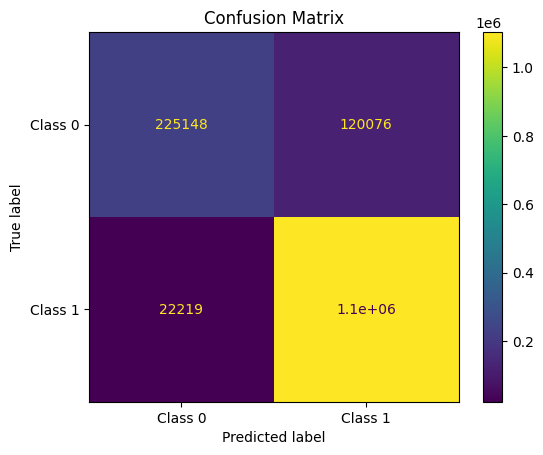

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)


plt.figure(figsize=(15, 10))
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm, 
    display_labels = [
        'Class 0', 
        'Class 1'
    ]
)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [13]:
confusion_matrix_dict = {
    label : value
    for label, value
    in zip(
        [
            "TN",
            "FP",
            "FN",
            "TP"
        ],
        cm.ravel()
    )
}
def calc_true_positive_rate(confusion_matrix_dict:dict) -> float:
    return confusion_matrix_dict["TP"]/(confusion_matrix_dict["TP"] + confusion_matrix_dict["FN"])


def calc_true_negative_rate(confusion_matrix_dict:dict) -> float:
    return confusion_matrix_dict["TN"]/(confusion_matrix_dict["TN"] + confusion_matrix_dict["FP"])


true_positive_rate_entropy = calc_true_positive_rate(confusion_matrix_dict)
print(f"True Positive Rate: {round(true_positive_rate_entropy,4)}")

true_negative_rate_entropy = calc_true_negative_rate(confusion_matrix_dict)
print(f"True Negative Rate: {round(true_negative_rate_entropy,4)}")

True Positive Rate: 0.9803
True Negative Rate: 0.6522


# Important Features

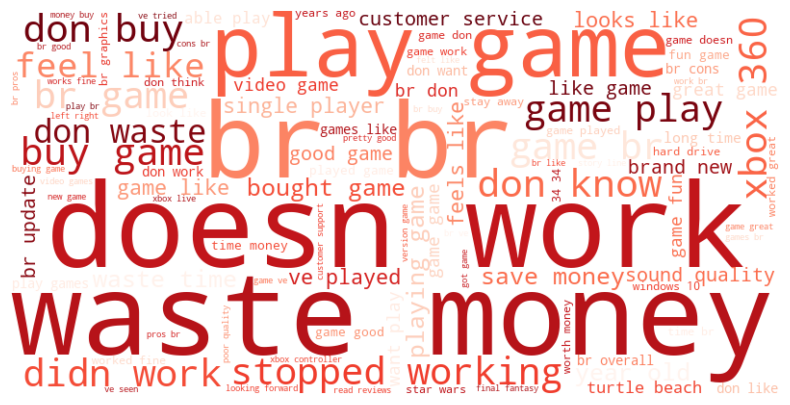

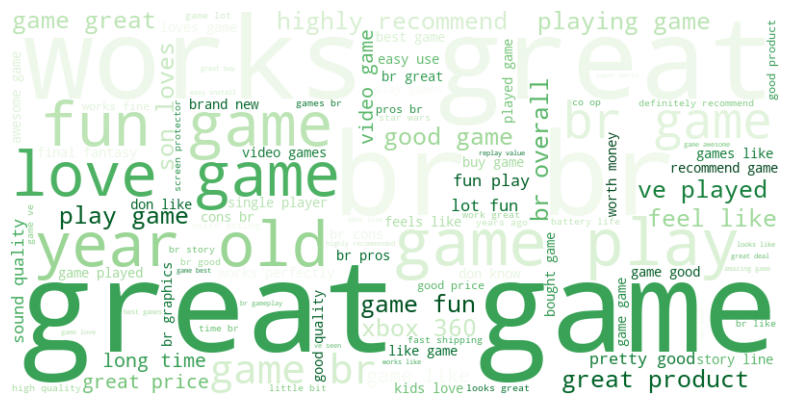

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


log_probabilities = clf.feature_log_prob_
feature_names = count_vect.get_feature_names_out()

for sentiment, color in zip([0, 1], ["Reds", "Greens"]):
    log_probabilities_sentiment = sorted(log_probabilities[sentiment,:])[::-1]
    features_sentiments = [feature_names[i] for i in log_probabilities[sentiment,:].argsort()[::-1]]
    
    # Create a WordCloud object with desired parameters
    wordcloud = WordCloud(
        width = 800, 
        height = 400, 
        background_color = "white",
        max_words = 100,
        colormap = color
    ).generate_from_frequencies(
        {
            feature: prob  
            for feature, prob 
            in zip(features_sentiments, log_probabilities_sentiment)
        }
    )

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off") # Turn off the axis labels and ticks
    plt.show()
    